In [18]:
import pandas as pd

In [19]:
df = pd.read_csv("smr.csv",decimal=",")
df

,Symbol,SMR Rating,Sales % Chg Lst Qtr,Sales % Chg Lst Yr,Sales Growth 3 Yr,AT Margin Accel,ROE
0,SUZ,A,13,26,22,No,103229.1
1,COR,A,11,11,12,No,39497.3
2,PBT,B,20,361,75,No,16944.0
3,MSI,A,12,12,9,No,4684.2
4,PAM,A,3,17,23,Yes,2960.8
...,...,...,...,...,...,...,...
2688,LTH,C,22,38,26,No,0.1
2689,OKTA,C,23,43,47,No,0.1
2690,VSAT,D,36,5,6,No,0.1
2691,SHLT,E,6,19,18,No,0.1


In [20]:
df = df.drop(["Symbol"],axis = 1)
df

,SMR Rating,Sales % Chg Lst Qtr,Sales % Chg Lst Yr,Sales Growth 3 Yr,AT Margin Accel,ROE
0,A,13,26,22,No,103229.1
1,A,11,11,12,No,39497.3
2,B,20,361,75,No,16944.0
3,A,12,12,9,No,4684.2
4,A,3,17,23,Yes,2960.8
...,...,...,...,...,...,...
2688,C,22,38,26,No,0.1
2689,C,23,43,47,No,0.1
2690,D,36,5,6,No,0.1
2691,E,6,19,18,No,0.1


In [21]:
secret_original_df = df.copy()
def get_original_df() -> pd.DataFrame:
    return secret_original_df.copy()

# Exploratory Data Analysis

In [11]:
rating_counts = df['SMR Rating'].value_counts()
print(rating_counts)

SMR Rating
B    1023
C     655
A     604
D     328
E      83
Name: count, dtype: int64


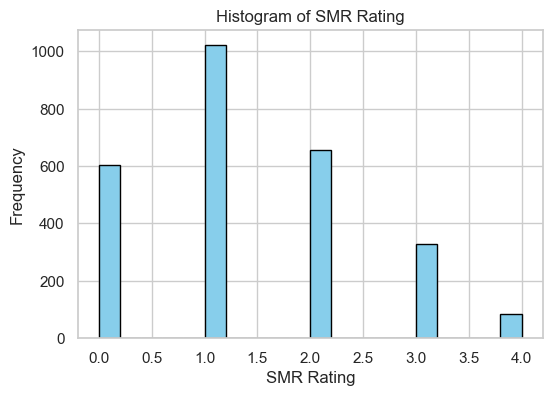

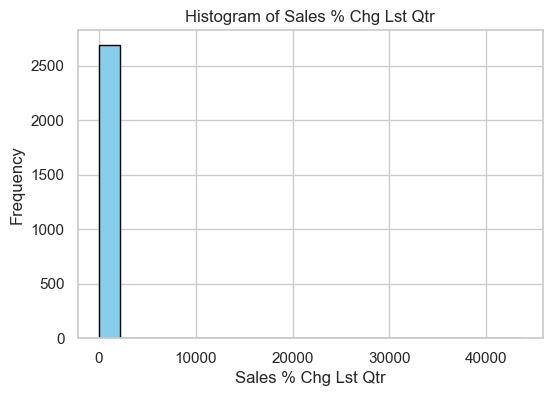

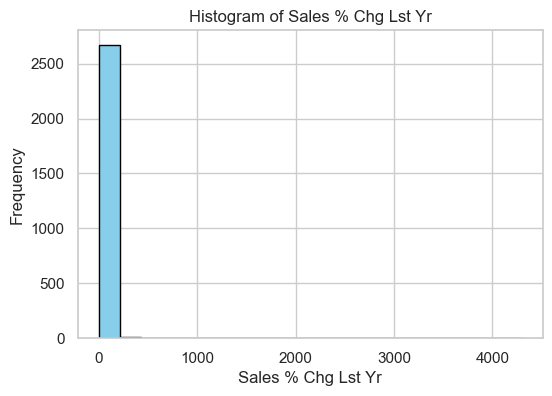

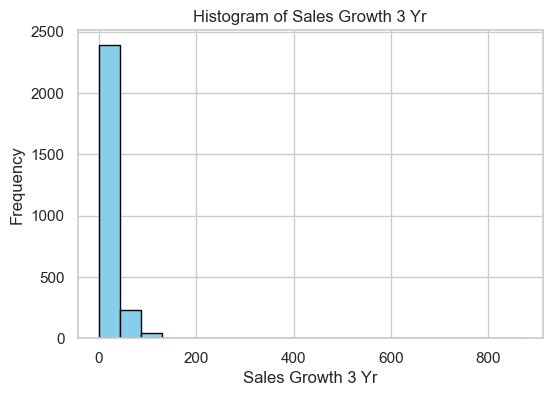

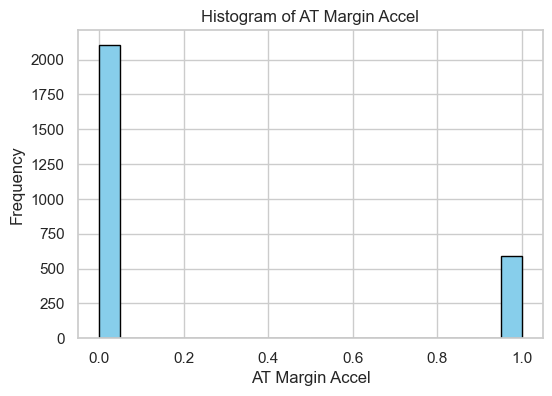

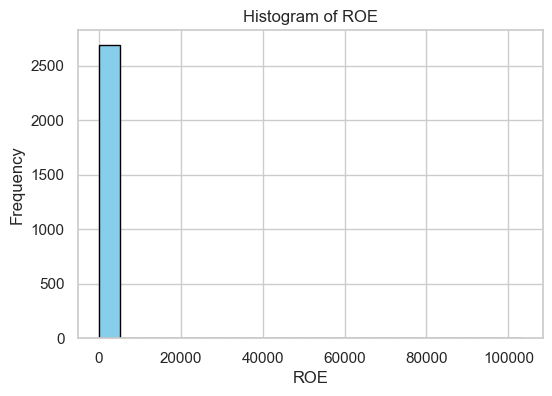

In [27]:
import matplotlib.pyplot as plt

# List of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Plot histograms for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


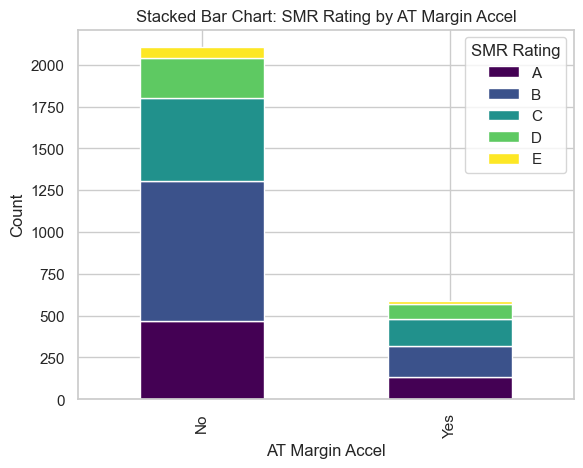

In [15]:
import matplotlib.pyplot as plt

# Group the data by 'AT Margin Accel' and 'SMR Rating' and count the occurrences
grouped_data = df.groupby(['AT Margin Accel', 'SMR Rating']).size().unstack()

# Plot stacked bar chart
ax = grouped_data.plot(kind='bar', stacked=True, colormap='viridis')

# Set labels and title
plt.xlabel('AT Margin Accel')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: SMR Rating by AT Margin Accel')
plt.xticks([0, 1], ['No', 'Yes'])  # Set x-ticks to represent '0' and '1'

# Add legend
plt.legend(title='SMR Rating')

# Show the plot
plt.show()


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


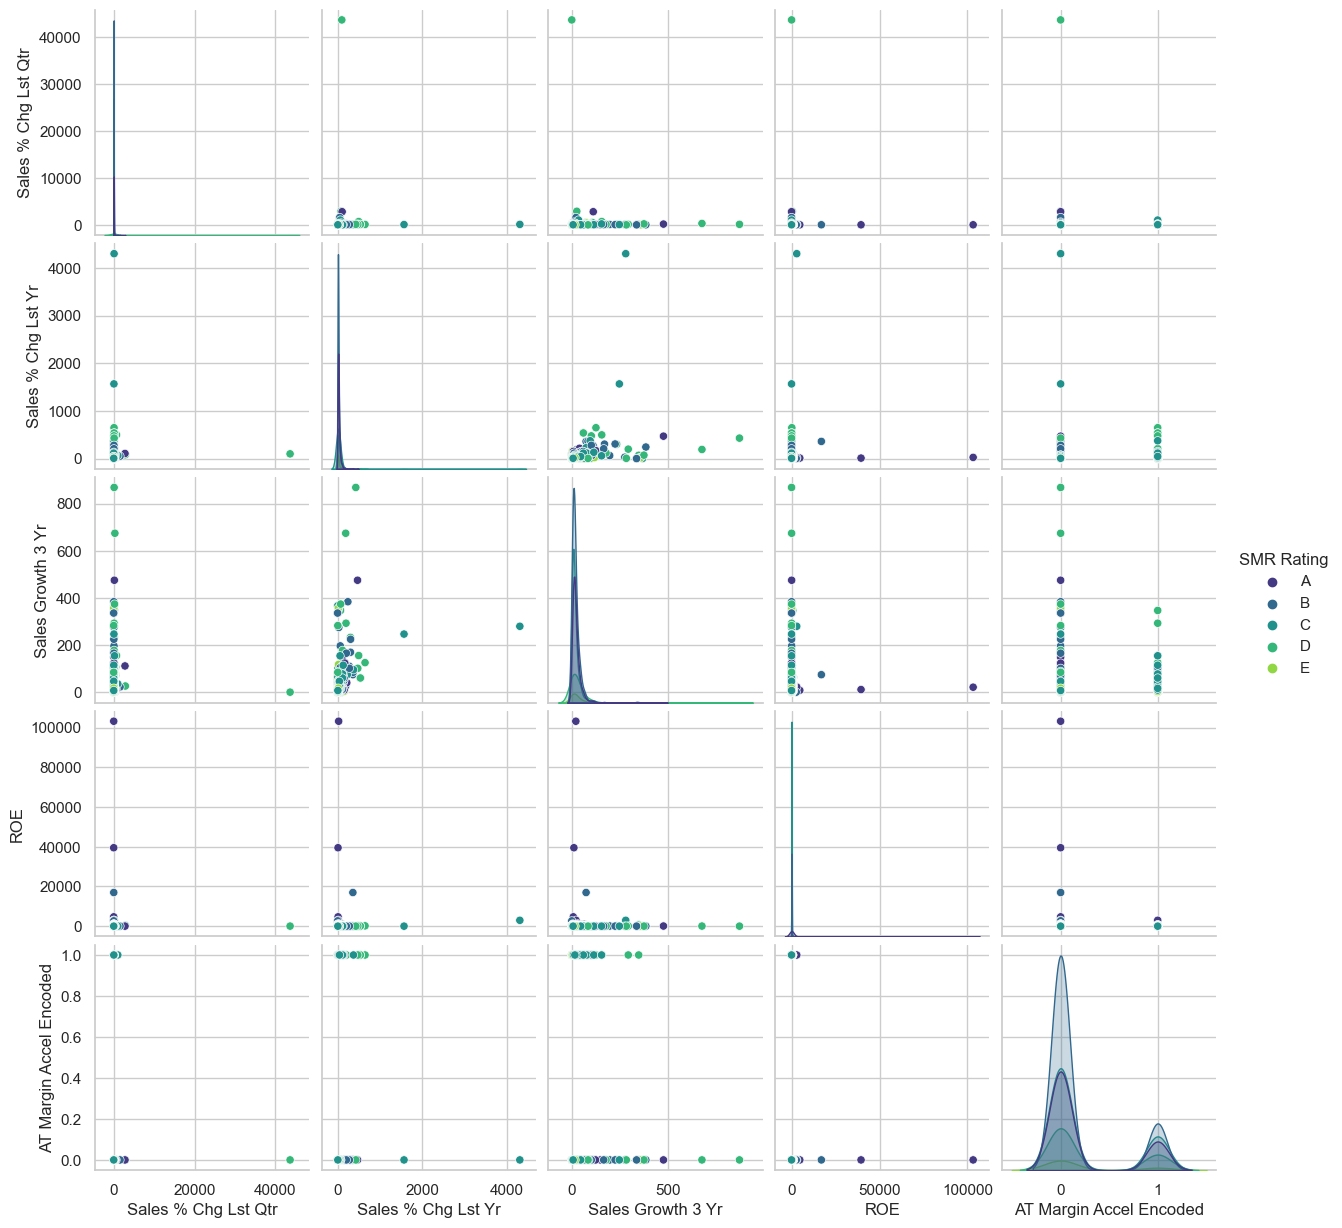

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Label encode 'AT Margin Accel' column
label_encoder = LabelEncoder()
df['AT Margin Accel Encoded'] = label_encoder.fit_transform(df['AT Margin Accel'])

# Set the style for the plots
sns.set(style="whitegrid")

# Create a pairplot with colored points based on 'SMR Rating' and 'AT Margin Accel Encoded'
sns.pairplot(df, hue="SMR Rating", palette="viridis")

# Show the plot
plt.show()


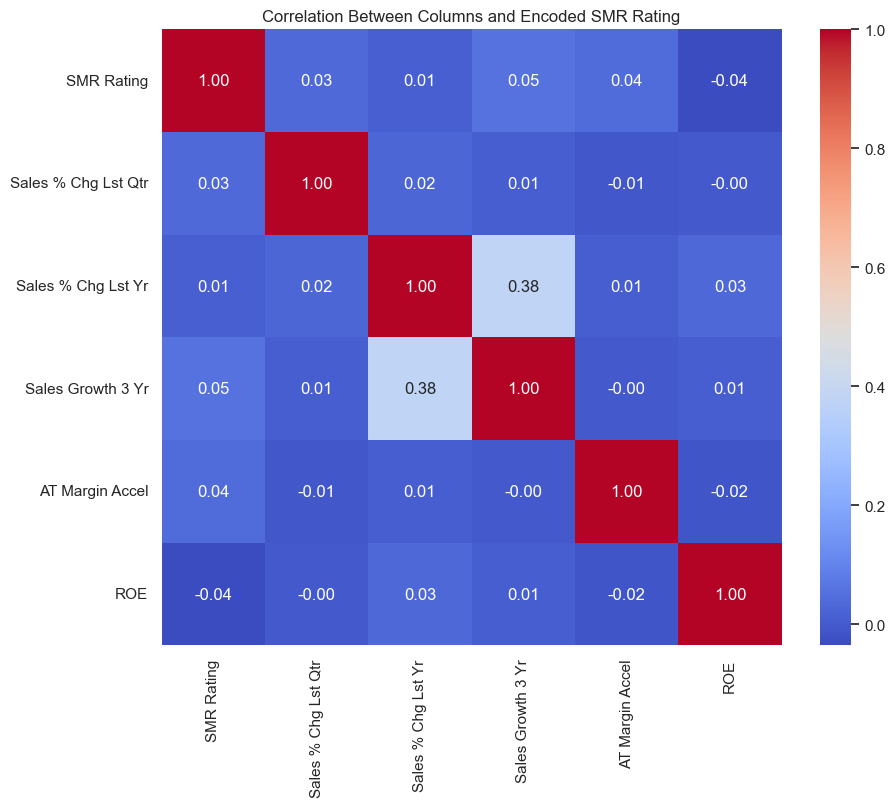

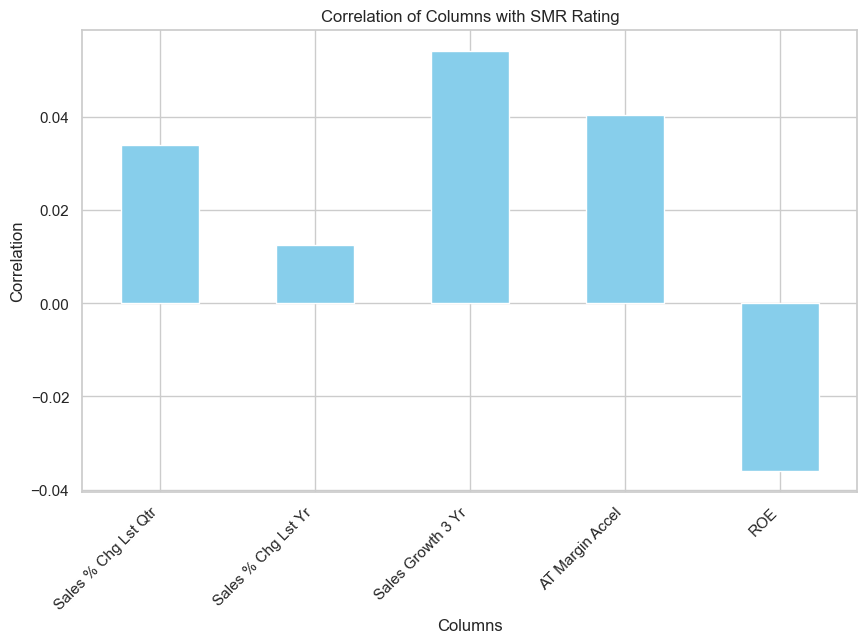

In [25]:
df = get_original_df()

# Import LabelEncoder from scikit-learn
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['AT Margin Accel'] = label_encoder.fit_transform(df['AT Margin Accel'])

label_encoder = LabelEncoder()
df['SMR Rating'] = label_encoder.fit_transform(df['SMR Rating'])

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Columns and Encoded SMR Rating')
plt.show()

# Calculate correlations between each column and 'SMR Rating Encoded'
correlations_with_rating = correlation_matrix['SMR Rating']

# Plot a bar chart
plt.figure(figsize=(10, 6))
correlations_with_rating.drop('SMR Rating').plot(kind='bar', color='skyblue')
plt.title('Correlation of Columns with SMR Rating')
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.show()


# Data Cleaning

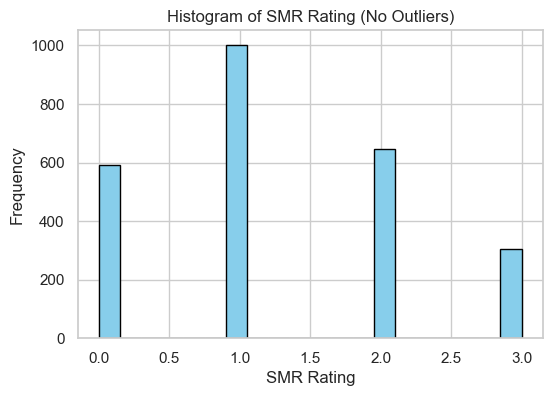

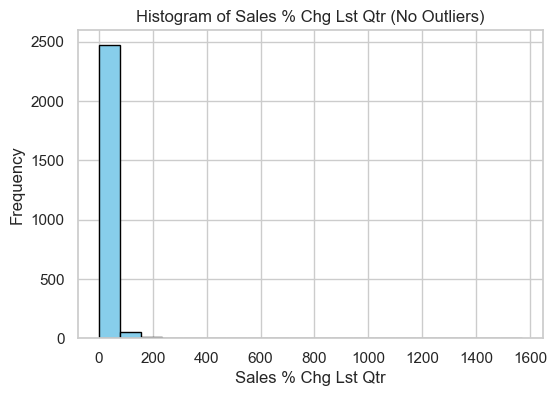

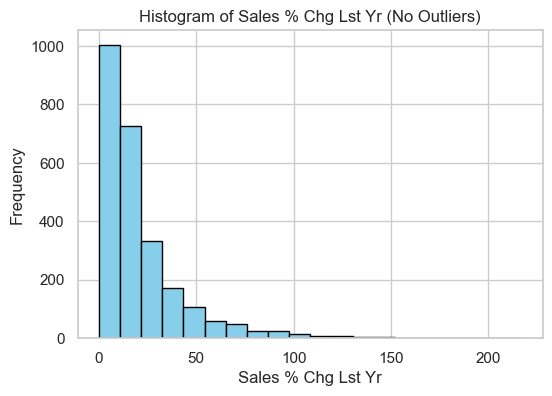

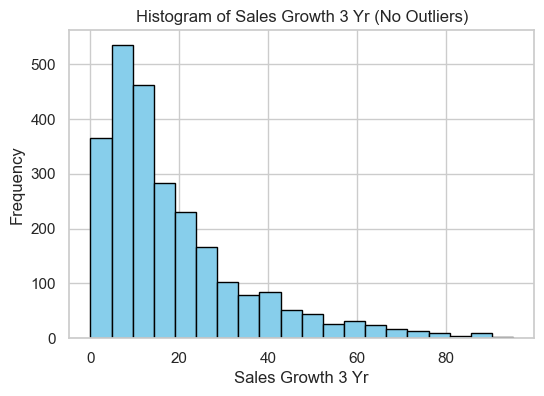

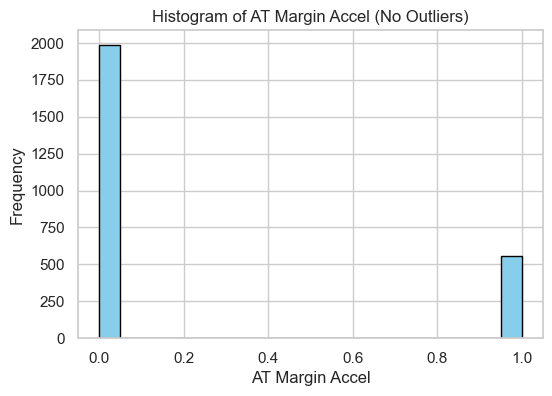

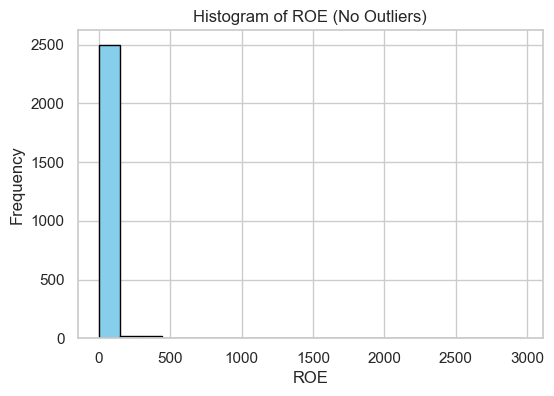

In [34]:
from scipy.stats import zscore

# Calculate Z-Scores for each numerical column
z_scores = zscore(df.select_dtypes(include=['int64', 'float64']))

# Set a threshold for Z-Score (e.g., 2 or -2, meaning values beyond 2 standard deviations are considered outliers)
threshold = 2

# Remove outliers based on Z-Scores
df_no_outliers = df[(z_scores < threshold).all(axis=1)]

# List of numerical columns in the cleaned DataFrame
numerical_columns_no_outliers = df_no_outliers.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Plot histograms for each numerical column after removing outliers
for column in numerical_columns_no_outliers:
    plt.figure(figsize=(6, 4))
    plt.hist(df_no_outliers[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column} (No Outliers)')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

df = df_no_outliers


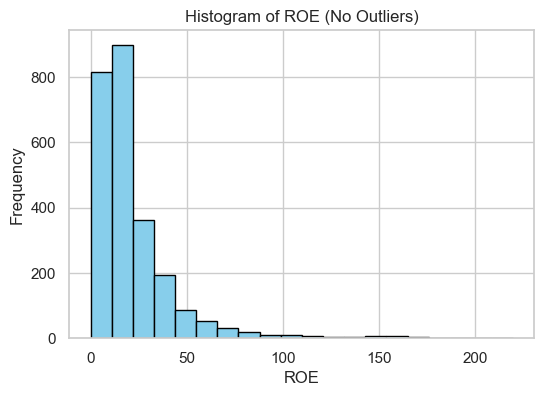

In [36]:
from scipy.stats import zscore

# Calculate Z-Scores for the "ROE" column
roe_z_scores = zscore(df['ROE'])

# Set a threshold for Z-Score (e.g., 2 or -2, meaning values beyond 2 standard deviations are considered outliers)
threshold = 2

# Create a mask to identify rows where the "ROE" column values are within the threshold
roe_no_outliers_mask = (roe_z_scores > -threshold) & (roe_z_scores < threshold)

# Filter the DataFrame to keep rows where "ROE" values are within the threshold
df_no_outliers_roe = df[roe_no_outliers_mask]

# Plot histogram for the "ROE" column after removing outliers
plt.figure(figsize=(6, 4))
plt.hist(df_no_outliers_roe['ROE'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of ROE (No Outliers)')
plt.xlabel('ROE')
plt.ylabel('Frequency')
plt.show()

df = df_no_outliers_roe

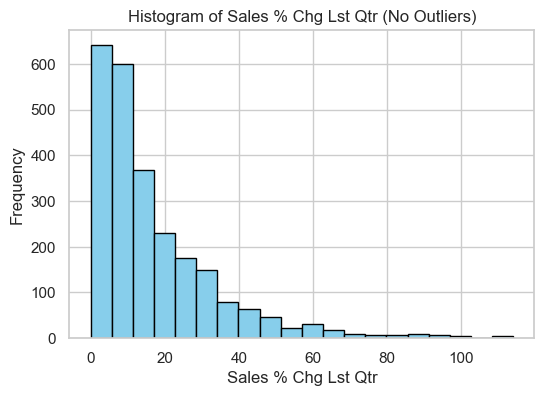

In [39]:
from scipy.stats import zscore

# Calculate Z-Scores for the "Sales % Chg Lst Qtr" column
sales_chg_z_scores = zscore(df['Sales % Chg Lst Qtr'])

# Set a threshold for Z-Score (e.g., 2 or -2, meaning values beyond 2 standard deviations are considered outliers)
threshold = 2

# Create a mask to identify rows where the "Sales % Chg Lst Qtr" values are within the threshold
sales_chg_no_outliers_mask = (sales_chg_z_scores > -threshold) & (sales_chg_z_scores < threshold)

# Filter the DataFrame to keep rows where "Sales % Chg Lst Qtr" values are within the threshold
df_no_outliers_sales_chg = df[sales_chg_no_outliers_mask]

# Plot histogram for the "Sales % Chg Lst Qtr" column after removing outliers
plt.figure(figsize=(6, 4))
plt.hist(df_no_outliers_sales_chg['Sales % Chg Lst Qtr'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Sales % Chg Lst Qtr (No Outliers)')
plt.xlabel('Sales % Chg Lst Qtr')
plt.ylabel('Frequency')
plt.show()

df = df_no_outliers_sales_chg

<Figure size 800x600 with 0 Axes>

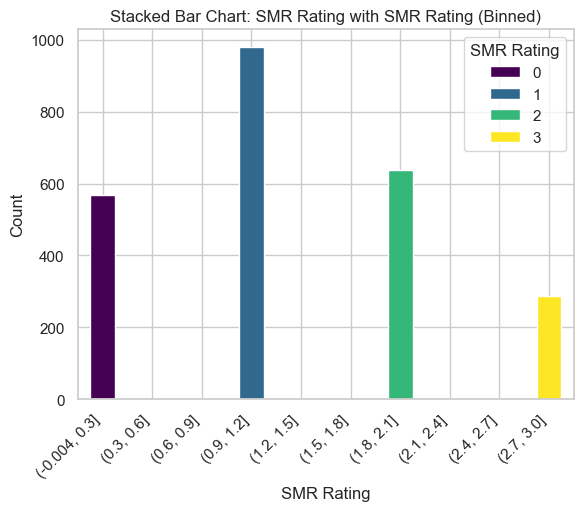

<Figure size 800x600 with 0 Axes>

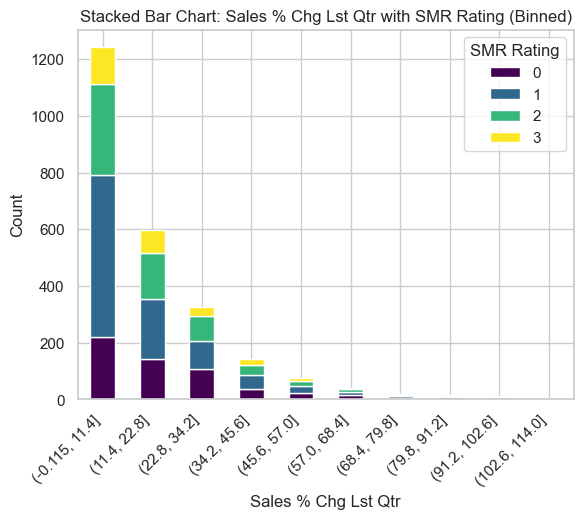

<Figure size 800x600 with 0 Axes>

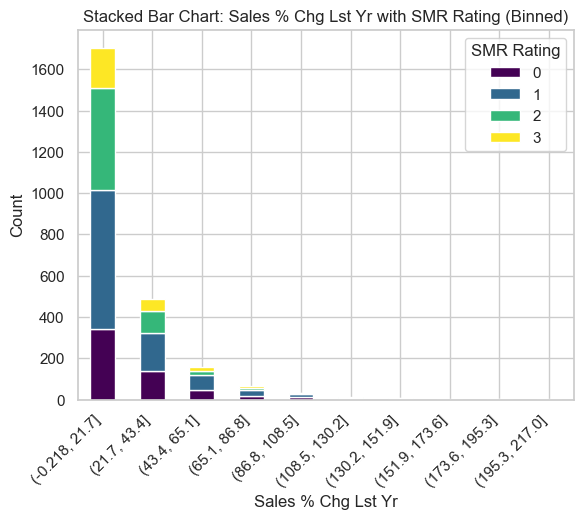

<Figure size 800x600 with 0 Axes>

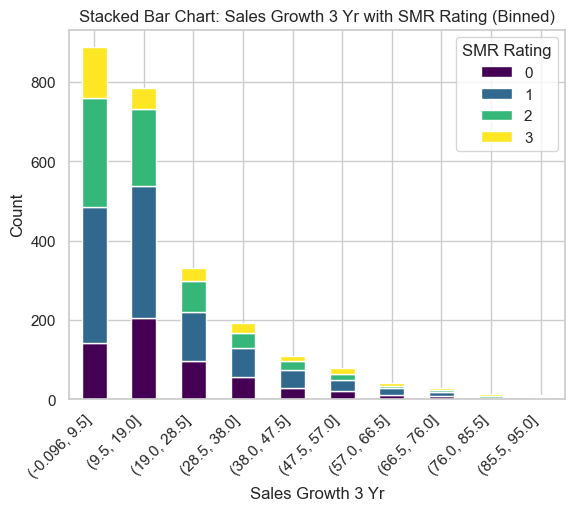

<Figure size 800x600 with 0 Axes>

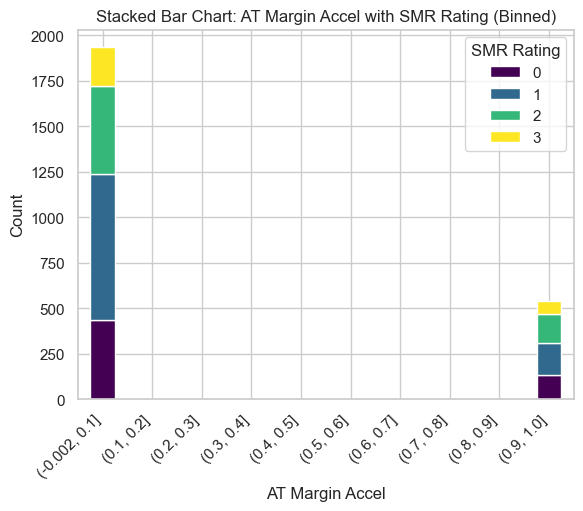

<Figure size 800x600 with 0 Axes>

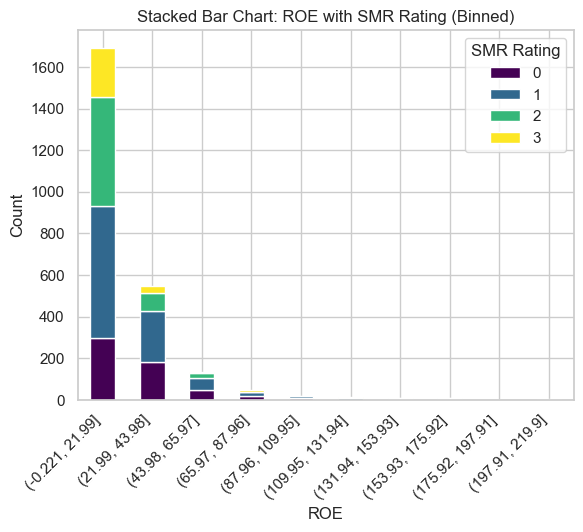

In [40]:
# List of numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Number of bins for each numerical column
num_bins = 10  # You can adjust the number of bins as needed

# Plot stacked bar charts for each numerical column with "SMR Rating" classification in bins
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    bins = pd.cut(df[column], bins=num_bins, include_lowest=True)
    stacked_data = df.groupby([bins, 'SMR Rating'])['SMR Rating'].count().unstack()
    stacked_data.plot(kind='bar', stacked=True, colormap='viridis')
    plt.title(f'Stacked Bar Chart: {column} with SMR Rating (Binned)')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='SMR Rating')
    plt.xticks(rotation=45, ha='right')
    plt.show()


# Feature Selection

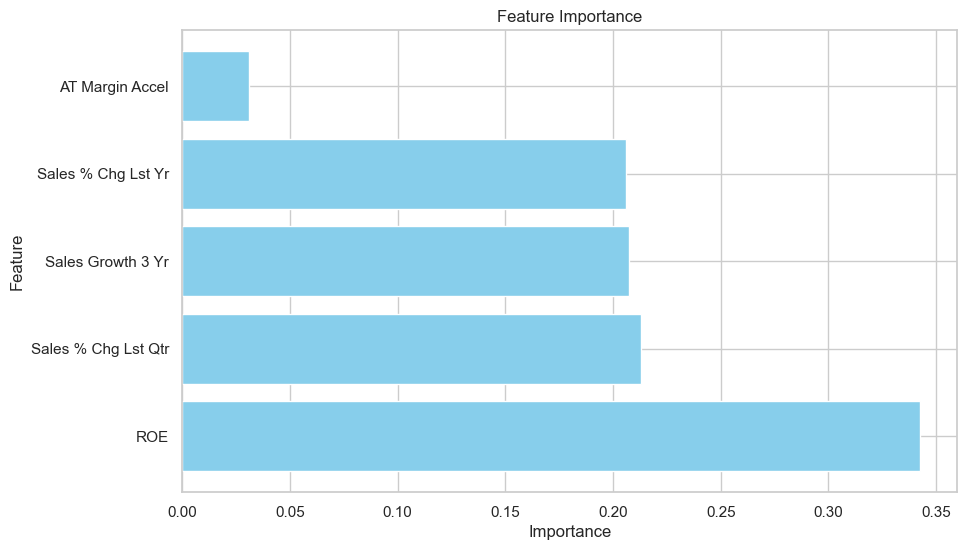

In [41]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming 'X' contains your features and 'y' contains your target variable 'SMR Rating Encoded'
X = df.drop(['SMR Rating'], axis=1)
y = df['SMR Rating']

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model to your data
rf_classifier.fit(X, y)

# Get feature importances from the trained Random Forest model
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame with feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


# Model

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score


# Assuming 'X' contains your features and 'y' contains your target variable 'SMR Rating Encoded'
X = df.drop(['SMR Rating'], axis=1)
y = df['SMR Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Print detailed classification report
print(classification_report(y_test, predictions))


Accuracy: 0.46
              precision    recall  f1-score   support

           0       0.38      0.44      0.41       115
           1       0.51      0.57      0.54       193
           2       0.50      0.42      0.46       134
           3       0.37      0.25      0.30        53

    accuracy                           0.46       495
   macro avg       0.44      0.42      0.43       495
weighted avg       0.46      0.46      0.46       495



In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

X = df.drop(['SMR Rating'], axis=1)
y = df['SMR Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = naive_bayes_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Print detailed classification report
print(classification_report(y_test, predictions))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, predictions)
print(f'ROC AUC Score: {roc_auc:.2f}')

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Accuracy: 0.36
              precision    recall  f1-score   support

           0       0.38      0.17      0.24       115
           1       0.42      0.34      0.38       193
           2       0.32      0.66      0.43       134
           3       0.15      0.04      0.06        53

    accuracy                           0.36       495
   macro avg       0.32      0.30      0.28       495
weighted avg       0.36      0.36      0.33       495



ValueError: multi_class must be in ('ovo', 'ovr')

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn import metrics

X = df.drop(['SMR Rating'], axis=1)
y = df['SMR Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg_classifier = LogisticRegression(random_state=42)

# Train the model on the training data
logreg_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = logreg_classifier.predict(X_test)


# Print detailed classification report
print(classification_report(y_test, predictions))


# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, predictions)
print(f'ROC AUC Score: {roc_auc:.2f}')

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


              precision    recall  f1-score   support

           0       0.39      0.12      0.19       115
           1       0.44      0.83      0.57       193
           2       0.47      0.30      0.36       134
           3       0.33      0.04      0.07        53

    accuracy                           0.44       495
   macro avg       0.41      0.32      0.30       495
weighted avg       0.42      0.44      0.37       495



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: multi_class must be in ('ovo', 'ovr')

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve


X = df.drop(['SMR Rating'], axis=1)
y = df['SMR Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Gradient Boosting Classifier
xgb_classifier = XGBClassifier(random_state=42)

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Print detailed classification report
print('Classification Report:')
print(classification_report(y_test, predictions))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, predictions)
print(f'ROC AUC Score: {roc_auc:.2f}')

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Accuracy: 0.47
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.41      0.41       115
           1       0.53      0.62      0.57       193
           2       0.45      0.40      0.43       134
           3       0.34      0.23      0.27        53

    accuracy                           0.47       495
   macro avg       0.43      0.41      0.42       495
weighted avg       0.46      0.47      0.46       495



ValueError: multi_class must be in ('ovo', 'ovr')

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

X = df.drop(['SMR Rating'], axis=1)
y = df['SMR Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Support Vector Machine (SVM) classifier
svm_classifier = SVC(probability=True, random_state=42)

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Print detailed classification report
print('Classification Report:')
print(classification_report(y_test, predictions))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, predictions)
print(f'ROC AUC Score: {roc_auc:.2f}')

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Accuracy: 0.47
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.30      0.34       115
           1       0.49      0.73      0.59       193
           2       0.48      0.43      0.45       134
           3       1.00      0.02      0.04        53

    accuracy                           0.47       495
   macro avg       0.59      0.37      0.35       495
weighted avg       0.52      0.47      0.43       495



ValueError: multi_class must be in ('ovo', 'ovr')

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

X = df.drop(['SMR Rating'], axis=1)
y = df['SMR Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=42)

# Train the classifier on the training data
logreg_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = logreg_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Print detailed classification report
print('Classification Report:')
print(classification_report(y_test, predictions))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, predictions)
print(f'ROC AUC Score: {roc_auc:.2f}')

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Accuracy: 0.44
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.12      0.19       115
           1       0.44      0.83      0.57       193
           2       0.47      0.30      0.36       134
           3       0.33      0.04      0.07        53

    accuracy                           0.44       495
   macro avg       0.41      0.32      0.30       495
weighted avg       0.42      0.44      0.37       495



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: multi_class must be in ('ovo', 'ovr')